# Silly string patterns

In [205]:
import plotly.graph_objects as go
import numpy
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.integrate import odeint
from IPython.display import Latex
from IPython.display import Image
import networkx as nx
import csv
import binascii
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## On beautiful things

In playing with simulations of simple rules for stringing wires across circularly distributed pegs, I discovered a  family of rules that generated a particularly beautiful set of patterns, shown below. In my experience, it is a good idea to investigate beautiful things. The things that I find beautiful have certain properties (symmetries and balances between order/chaos) that are often useful for engineering purposes. This document is an extended investigation of these string patterns that is an attempt to mine them for the properties that make them beautiful.

![SegmentLocal](Fast.gif "segment")

## Some mysteries to solve in this document:
1. Why are some patterns symmetric, and others are asymmetric?
2. Why do some seem to show much more complexity and many more strings than others?
3. Are these forming closed networks? If so, how many?
4. What are the properties of the networks that are being formed?
5. Which of these patterns could be built with a single string?

## What are we looking at?

The above plot is a visual representation of the interaction between two integer sequences, which I will call $Y_1$ and $Y_2$.

\begin{align}
%X_i &= i\mod{N} \hspace{0.5cm} \text{for $i$}\in[0,1,2,\dots]\\
Y_1 &= \left(p_1 \cdot i\right)\mod{k_1} \hspace{0.5cm} \text{for $i$}\in[0,1,2,\dots]\\
Y_2 &= \left(p_2 \cdot i\right)\mod{k_2} \hspace{0.5cm} \text{for $i$}\in[0,1,2,\dots]
\end{align}

**The $Y$ sequence:**

The $Y$ sequence has two parameters, $p$ and $k$. The $Y$ sequence is the sequence of integer multiples of $p$ (any non-negative integer) modulo $k$ (any positive integer). This sequence looks very different for different combinations of $p$ and $k$, as illustrated below.

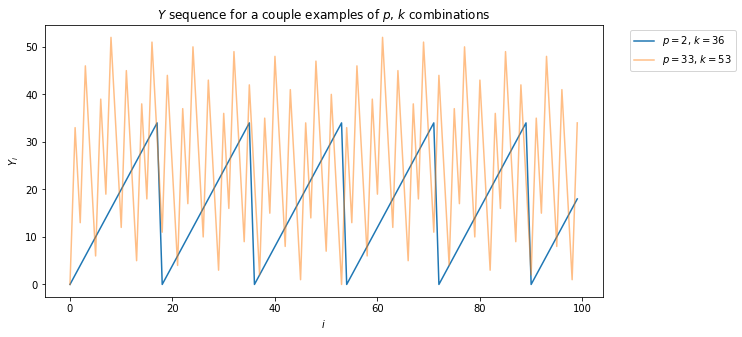

In [6]:
x = numpy.arange(0,100)
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(x, (x*2)%36, label="$p=2$, $k=36$");
plt.plot(x, (x*33)%53, label="$p=33$, $k=53$", alpha=0.5);
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('$Y$ sequence for a couple examples of $p$, $k$ combinations');
plt.xlabel('$i$');plt.ylabel('$Y_i$');plt.show()

**Forming patterns from the sequences**:

Each element of the two sequences is connected. Starting with $i=0$ and iterating upward, each $Y_{1,i}$ and $Y_{2,i}$ is calculated and a connection is formed between those with the same index. In other words, each row of the below table is a connection.

 $i$  ||| $Y_{1,i}$| $Y_{2,i}$
------|||------|------
   0  ||| $y_{1,0}$| $y_{2,0}$
   1  ||| $y_{1,1}$| $y_{2,1}$
   2  ||| $y_{1,2}$| $y_{2,2}$
   3  ||| $y_{1,3}$| $y_{2,3}$
   $\vdots$ ||| $\vdots$ | $\vdots$

The specific geometries of the string patterns depend on where in space one decides to place each element of the sequence. To form the patterns shown above, $k_{max}$ pegs are arranged in a circular pattern, where $k_{max}=\text{max}(k_1,k_2)$. Each peg represents a particular element of the $Y_{max}$ array.

Because the value for $k_{min} = \text{min}(k_1,k_2)$ is less than $k_{max}$, the values contained in the $Y_{min}$ sequence will also not exceed $k_{min}$. The physical placement for each element of the $Y_{min}$ sequence is the $y_{min,i}^{th}$ peg as counted from a designated 0 peg, walking in the same direction that the $Y_{max}$ sequence walks. This choice of arrangement overlays the elements of the two sequences and yields that patterns that piqued my interest. However, one may choose any physical arrangement of the elements of the sequences. 

Below is an animation showing the construction of one of these patterns by connecting the two sequences ($p_1=2$, $k_1=36$, $p_2=1$, $k_2=100$), the final configuration, an alternate configuration formed by separating the $Y_{max}$ and $Y_{min}$ sequences physically ($Y_{max}$ on the inside, $Y_{min}$ on the outside), and the transformation of the first geometry into the second. A structure is specified by the connections, the placement of the nodes in physical space is arbitrary.

*Iterative construction of an example pattern ($N=100$, $p=2$, $k=36$), 10 connection per frame*

![SegmentLocal](build.gif "segment")

*Final example pattern ($N=100$, $p=2$, $k=36$)*

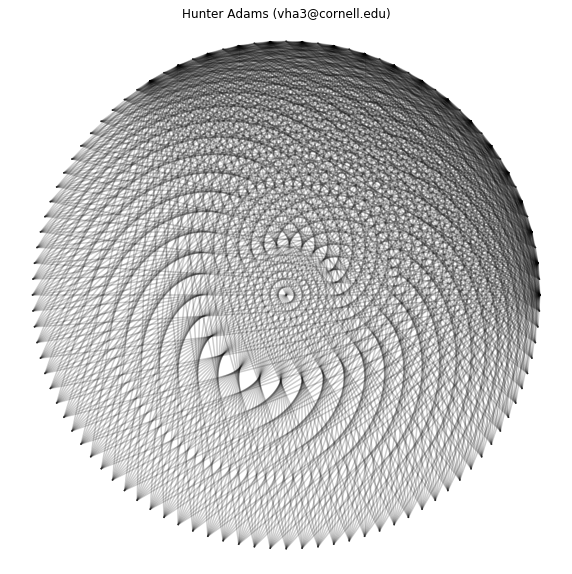

In [1623]:
theta = numpy.linspace(0, 2*numpy.pi, 101)
x = numpy.cos(theta)
y = numpy.sin(theta)
# plt.plot(x,y,'r.')
# plt.plot(x[0],y[0],'b*')
plt.axis('equal')
plt.ylim([-1.1,1.1])
plt.xlim([-1.1,1.1])

# for j in range(1,100):
count=0
plt.axis('off')
for i in range(901):
    dice1=count%100
    dice2=int(2*count)%(36)
    if (dice2%4==0):
        plt.plot([x[dice1],x[dice2]], [y[dice1],y[dice2]], color='black', alpha=0.2)
    else:# (dice2%2==1):
        plt.plot([x[dice1],x[dice2]], [y[dice1],y[dice2]], color='black', alpha=0.2)
    count += 1
plt.title('Hunter Adams (vha3@cornell.edu)')
plt.show()
# plt.savefig('./plots/%d'%j)
# plt.close()

*Alternate geometry for the same example pattern ($N=100$, $p=2$, $k=36$)*

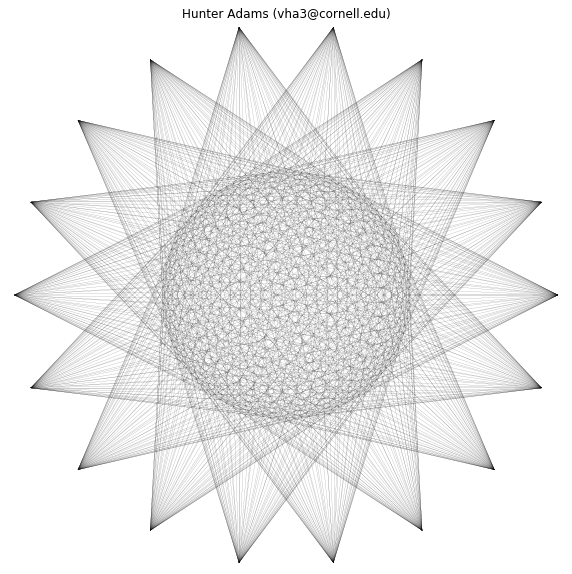

In [1598]:
theta = numpy.linspace(0, 2*numpy.pi, 101)
theta2 = numpy.linspace(0, 2*numpy.pi, 37)
x = 0.5*numpy.cos(theta)
y = 0.5*numpy.sin(theta)
x2=1.1*numpy.cos(theta2)
y2=1.1*numpy.sin(theta2)
# plt.plot(x,y,'b.')
# plt.plot(x[0],y[0],'black','.')
plt.axis('equal')
plt.ylim([-1.1,1.1])
plt.xlim([-1.1,1.1])

# for j in range(1,100):
count=0
plt.axis('off')
for i in range(901):
    dice1=count%100
    dice2=int(2*count)%(36)
    if (dice2%4==0):
        plt.plot([x[dice1],x2[dice2]], [y[dice1],y2[dice2]], color='black', alpha=1, linewidth=0.1)
    else:# (dice2%2==1):
        plt.plot([x[dice1],x2[dice2]], [y[dice1],y2[dice2]], color='black', alpha=1, linewidth=0.1)
#     else:
#         plt.plot([x[dice1],x2[dice2]], [y[dice1],y2[dice2]], color='black', alpha=0.2)
    count += 1
plt.title('Hunter Adams (vha3@cornell.edu)')
plt.show()
# plt.savefig('./testy.png')
# plt.close()

*The equivalence of the above two representations is illustrated by the animation below, which shows the transition of one representation into the other.*

![SegmentLocal](morphing.gif "segment")

## Properties of the sequences

### Periods of the individual sequences

\begin{align}
M &= \text{period of $Y$} = \frac{k}{\text{gcd}(p,k)}
\end{align}

If $p$ and $k$ are coprime, then $M$ will simply be equal to $k$. If not, it will be $k$ divided by the greatest common divisor of $p$ and $k$.

**Proof 1.0:**

We want the **lowest nonzero value** for $x$ such that:

\begin{align}
p \cdot x = k \cdot y
\end{align}

Rewrite $p$ and $k$ in terms of their greatest common divisor, $m$, and two coprime numbers $p'$ and $k'$:

\begin{align}
p' \cdot m \cdot x = k' \cdot m \cdot y
\end{align}

Cancel the common divisor:

\begin{align}
p' \cdot x = k' \cdot y
\end{align}

Because $p'$ and $k'$ are coprime, the smallest nonzero values for $x$ and $y$ for which this expression holds are:

\begin{align}
x &= k'\\
y &= p'
\end{align}

Substitute into the above expression:

\begin{align}
p \cdot x = k\cdot y =  k \cdot p'
\end{align}

Solve for $x$:

\begin{align}
x = k \cdot \frac{p'}{p} 
\end{align}

Substitute the expression for $p$:

\begin{align}
x = k\cdot \frac{p'}{p' \cdot m} = \frac{k}{m}
\end{align}

Thus:

\begin{align}
M = \frac{k}{m} =  \frac{k}{\text{gcd}(p,k)} = k'
\end{align}

By similar analysis, it can be shown that $y$ in the above expressions is equal to $\frac{p}{m} = \frac{p}{\text{gcd}(p,k)} = p'$.

### Set of numbers which composes the sequence

What is the set of number which appears in the sequence? It will be the integer multiples of the greatest common divisor among $p$ and $k$.

\begin{align}
\text{elements of $Y$} &= \{0, 1, 2, \dots, M-1\} \cdot \text{gcd}(p,k)
\end{align}

In the case that $p$ and $k$ are coprime, the separating interval (gcd) will equal 1.

**Why?**

The sequence $Y$ takes the integer multiples of a number $p$, divides each by another number, $k$, and returns the remainder. Put alternatively, $Y$ returns $r$ in the expression below, where $i$ and $x$ are non-negative integers that are constrained such that $0\leq p\cdot i - k\cdot x < k$.

\begin{align}
p\cdot i = k\cdot x + r
\end{align}

Solve for $r$:

\begin{align}
r &= p \cdot i - k \cdot x
\end{align}

Represent $p$ and $k$ as the coprime numbers $p'$ and $k'$ multiplied by a greatest common divisor $m$:

\begin{align}
r &= p' \cdot m \cdot i - k' \cdot m \cdot x
\end{align}

Simplify:

\begin{align}
r &= m\left(p' \cdot i - k' \cdot x\right)
\end{align}

For $i \in [0,k')$, $x \in [0,p')$, as shown in the previous section. $i$ and $x$ are constrained such that the difference $0 \leq p'\cdot i - k' \cdot x < k'$ (since $r$ represents the remainder after division). Consider the term in the parentheses. We know that the following is true:

1. The maximum value that *could* be in this sequence is $k'-1$.
2. The minimum value that *could* be in this sequence is $0$.
3. The length of a period of this sequence is $k'$ (as shown in Proof 1).
4. **No value in the sequence is repeated in one period of the sequence.**

In order for all four of the above to be true, the term in the parentheses, for all possible values of $i$ and $x$, must contain all integers from 0 to $k'-1$.

### How do we know this is periodic?

Consider the equation from above:

\begin{align}
r &= m\left(p' \cdot i - k' \cdot x\right)
\end{align}

When $i=k=0$, this expression reduces to $0$. When $i$ is an integer multiple of $\frac{k'}{m}$ and $x$ is the *same* integer multiple of $\frac{p'}{m}$, the expression also reduces to 0, as shown below (see Proof 1):

\begin{align}
r &= m\left(p' \cdot j\cdot \frac{k'}{m} - k' \cdot j\cdot \frac{p'}{m}\right) = 0
\end{align}

But what about the case when the value for $i$ is $j\cdot \frac{k'}{m} < i < (j+1)\cdot \frac{k'}{m}$ and the value for $x$ is $j\cdot \frac{p'}{m} < x < (j+1)\cdot \frac{p'}{m}$? Let $i=j\cdot \frac{k'}{m} + \tilde{i}$ and $x = j\cdot \frac{p'}{m}+\tilde{x}$, where $\tilde{i}<\frac{k'}{m}$ and $\tilde{x}< \frac{p'}{m}$.

\begin{align}
r &= m\left(p' \left[ j\cdot \frac{k'}{m} + \tilde{i}\right] - k' \left[ j\cdot \frac{p'}{m} + \tilde{x}\right]\right)\\
 &= m\left(p' \cdot j\cdot \frac{k'}{m} - k' \cdot j\cdot \frac{p'}{m}\right) + m\left(p' \cdot \tilde{i} - k' \cdot \tilde{x}\right)\\
 &= 0 + m\left(p' \cdot \tilde{i} - k' \cdot \tilde{x}\right)\\
&= m\left(p' \cdot \tilde{i} - k' \cdot \tilde{x}\right)
\end{align}

Which is the same form as before. Thus, the sequence repeats

### The order of the numbers in the sequence

From the below expression, it is clear that two sequences that share the same $p'$ and $k'$ are *identical* up to a multiplicative factor $m$.

\begin{align}
r &= m\left(p' \cdot i - k' \cdot x\right)
\end{align}

Thus, the following two representations yield an identical sequence:

\begin{align}
Y_i &= \left(p \cdot i\right)\mod{k} \hspace{0.5cm} \text{for $i$}\in[0,1,2,\dots]\\
&= m \cdot \left[ \left(p' \cdot i\right)\mod{k'}\right] \hspace{0.5cm} \text{for $i$}\in[0,1,2,\dots]\\
\end{align}

For a single period of the sequence, $i \in [0,k')$.

### An instantiation of a $Y$ sequence

Parameters:
p: 8
k: 36

Expected period: 9
GCD of p and k: 4
Expected numbers to appear:
[0, 4, 8, 12, 16, 20, 24, 28, 32]
Expected order of those numbers (by index of the above array):
[0, 2, 4, 6, 8, 1, 3, 5, 7]
Written alternatively:
[0, 2, 4, 6, 8, 1, 3, 5, 7] x 4<--- gcd of p and k


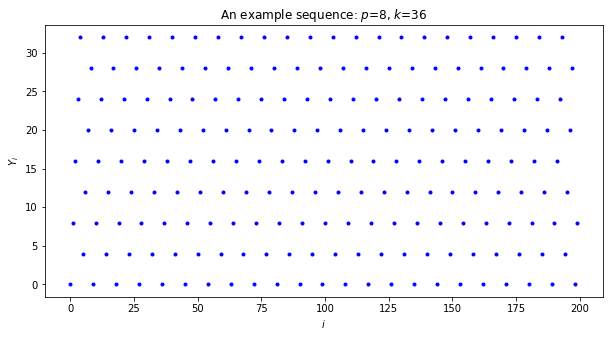

First 200 terms in sequence:
[0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8, 16, 24, 32, 4, 12, 20, 28, 0, 8]


In [196]:
p=8
k=36

test = []
nums = []
nums_order = []

print('Parameters:')
print('p: %d'%p)
print('k: %d\n'%k)
per = k/numpy.gcd(p,k)
print('Expected period: %d'%per)
print('GCD of p and k: %d'%numpy.gcd(p,k))
for i in range(int(per)):
    nums.extend([i*numpy.gcd(p,k)])
    nums_order.extend([int((i*(p/numpy.gcd(p,k)))%(k/numpy.gcd(p,k)))])
print('Expected numbers to appear:')
print(nums)
print('Expected order of those numbers (by index of the above array):')
print(nums_order)
print('Written alternatively:')
print(str(nums_order)+' x ' + str(numpy.gcd(p,k)) + '<--- gcd of p and k')
plt.rcParams['figure.figsize'] = [10, 5]
count=0
for i in range(200):
    test.extend([int(p*count)%(k)])
    count += 1
plt.plot(test, 'b.');plt.xlabel('$i$');plt.ylabel('$Y_i$')
plt.title('An example sequence: $p$=%d, $k$=%d'%(p,k))
plt.show()
print('First 200 terms in sequence:\n'+str(test))

## Properties of the coupled sequence

The patterns under consideration are created by drawing connecting lines between two sequences of the form studied in the previous section. This creates a sequence of connections that is studied in this section.

### Period of the coupled sequence

We have two sequences, one with length $N$ and the other with length $M$. The number of steps required for periodicity *between the two sequences* is lowest common multiple of the length of each sequence.

\begin{align}
T &= \text{period of coupled sequence} = \text{lcm}(N,M) = \frac{N \cdot M}{\text{gcd}(N, M)}
\end{align}

### With how many nodes in the other sequence does each node connect?

We are laying one sequence above the other and connecting the nodes directly on top of one another. The two sequences have different periods, so one will reset before the other. We keep doing this until their resets coincide.

In each sequence, each term in the sequence appears only once. So, if two terms line up, they won't line up again until one full period of the coupled sequences has been achieved. Thus, every time a sequence is added, each node in that sequence aligns with a node from the other sequence that it has not seen before (in a single period, the alignments then repeat).

So, each node in the $M$ sequence connects with $\frac{T}{M} = \frac{N}{\text{gcd}(N,M)}$ *different* nodes. Each node in the $N$ sequence connects with $\frac{T}{N} = \frac{M}{\text{gcd}(N,M)}$ *different* nodes.

\begin{align}
\text{Number of connections for each node in $M$ sequence} &= \frac{T}{M} = \frac{N}{\text{gcd}(N,M)}\\
\text{Number of connections for each node in $N$ sequence} &= \frac{T}{N} = \frac{M}{\text{gcd}(N,M)}
\end{align}

Where each of these connections is to a *different node*. 

### How many separate networks are formed by the connections among nodes?

\begin{align}
\text{Number of disconnected networks} &= \text{gcd}(N, M)
\end{align}

#### Why?

We have two sequences, one of length $M$ and the other of length $N$. Supposed that each sequence is indexed from 0 to its length. Then, the connections between sequences are formed between each of the following sets of indices:

\begin{align}
\left(i \% M\right) \longleftrightarrow \left(i \% N\right) \hspace{1cm} \text{ for $i \in \left[0, T = \frac{N\cdot M}{\text{gcd}(N, M)}\right)$}
\end{align}

One of these sequences of indices counts from 0 to $M$ and then resets, the other counts from 0 to $N$ and then resets. Connections are formed until the $i=T$, the lowest common multiple of $N$ and $M$, after which the same connections are repeated.

For a particular index of the $M$ sequence, $j$, what is the set of all indices in the $N$ sequence with which it connects?

\begin{align}
j \longleftrightarrow \left(\left((i\cdot M) + j\right) \% N\right) \hspace{1cm} \text{ for $i \in \left[0, \frac{T}{M}\right)$}
\end{align}

The connect set contains all unique connections for a particular index, $j$. If a connect set exists for each value of $j$, the question is how many *different* connect sets exist over all possible $j$ values. The above expression is very similar to that for each individual sequence. It returns the remainder after division of $i\cdot M + j$ by $N$. Similar to before, it returns $r$ in the below expression where $0\leq i\cdot M + j < N$.

\begin{align}
i\cdot M + j = Nx + r
\end{align}

Solve for $r$:

\begin{align}
r &= i\cdot M + j - Nx
\end{align}

Write in terms of coprime values multiplied by a greatest common divisor:

\begin{align}
r &= i\cdot M' \cdot m - N' \cdot m \cdot x + j
\end{align}

Rewrite:

\begin{align}
r &= m\left(i\cdot M' - x \cdot N'\right) + j
\end{align}

Where $M'$ and $N'$ are coprime. So, as shown before, the term in the parentheses contains all of the integers from 0 to $\frac{T}{M}$, multiplied by the greatest common divisor of $N$ and $M$, $m$. The variable $j$ specifies the index of the $M$ sequence for which we are calculating connections. So, if $m$ is 1, then we get the same set of connections for all $j$ values. If $m$ is 2, there are two possible sets of connections. Etc. The number of distinct networks is given by the greatest common divisor of $N$ and $M$.

### What are the properties of those networks?

From the expression below (from above), some properties of the networks can be determined.

\begin{align}
r &= m\left(i\cdot M' - x \cdot N'\right) + j
\end{align}

1. Each network contains the same number of $M$ sequence nodes $\left(\frac{M}{\text{gcd}(N, M)}\right)$.
2. Each network contains the same number of $N$ sequence nodes $\left(\frac{N}{\text{gcd}(N, M)}\right)$.
3. No two networks share any $M$ sequence nodes or any $N$ sequence nodes.
3. Within each network, every $M$ sequence node connects with every $N$ sequence node.
4. As a consequence of (4), each node in the $M$ sequence is 1 hop away from every other node in the $M$ sequence via one of $\left(\frac{N}{\text{gcd}(N, M)}\right)$ possible paths.
4. As a consequence of (4), each node in the $N$ sequence is 1 hop away from every other node in the $N$ sequence via one of $\left(\frac{M}{\text{gcd}(N, M)}\right)$ possible paths.

### An instantiation

For the same set of parameters as before, we can solve for the number of distinct networks that compose the string structure, and then draw those networks:

Expected number of networks: 2
Expected N nodes per network: 50.0
Expected M nodes per network: 9.0


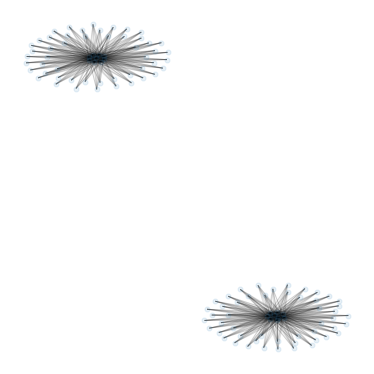

In [304]:
N = 100
p = 2
k = 36
M = int(k/numpy.gcd(p, k))
T = numpy.lcm(N, M)

num_networks = numpy.gcd(N, M)
mper_network = M/num_networks
nper_network = N/num_networks

# for j in range(1,100):
count=0
f= open("edgelist.csv","w+")
for i in range(T):
    dice1=count%N
    dice2=int(p*count)%(k) + N
    f.write("%d,"%dice1)
    f.write("%d\n"%dice2)
    count += 1
f.close()

print('Expected number of networks: '+str(num_networks))
print('Expected N nodes per network: '+str(nper_network))
print('Expected M nodes per network: '+str(mper_network))

plt.rcParams['figure.figsize'] = [5, 5]

G=nx.Graph()
with open('edgelist.csv') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in spamreader:
        G.add_edge(int(row[0]),int(row[1]))
# G.add_edge(100,70)
pos = nx.spring_layout(G, iterations=900)
nx.draw(G, node_size=25, alpha=0.1)
plt.show()
# nx.draw(G1, pos, node_size=50, with_labels=False)
# plt.show()

And we can redraw the same images as before, but differentially color the two separate networks:

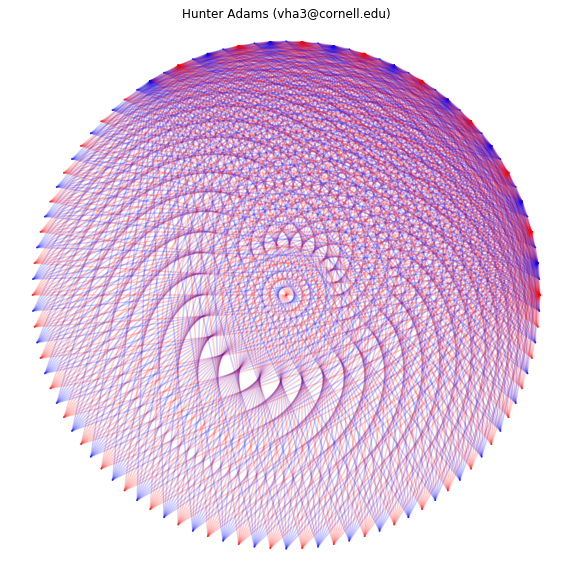

In [322]:
plt.rcParams['figure.figsize'] = [10, 10]
theta = numpy.linspace(0, 2*numpy.pi, 101)
x = numpy.cos(theta)
y = numpy.sin(theta)
# plt.plot(x,y,'r.')
# plt.plot(x[0],y[0],'b*')
plt.axis('equal')
plt.ylim([-1.1,1.1])
plt.xlim([-1.1,1.1])

# for j in range(1,100):
count=0
plt.axis('off')
for i in range(901):
    dice1=count%100
    dice2=int(2*count)%(36)
    if (dice2%4==0):
        plt.plot([x[dice1],x[dice2]], [y[dice1],y[dice2]], color='red', alpha=0.2)
    else:# (dice2%2==1):
        plt.plot([x[dice1],x[dice2]], [y[dice1],y[dice2]], color='blue', alpha=0.2)
    count += 1
plt.title('Hunter Adams (vha3@cornell.edu)')
plt.show()
# plt.savefig('./plots/%d'%j)
# plt.close()

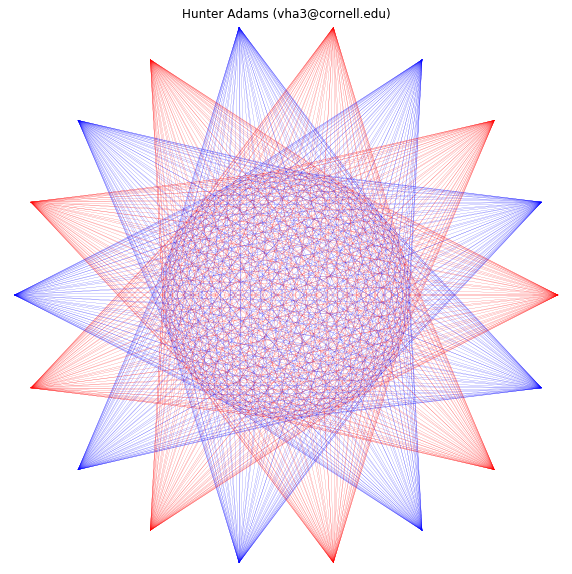

In [323]:
theta = numpy.linspace(0, 2*numpy.pi, 101)
theta2 = numpy.linspace(0, 2*numpy.pi, 37)
x = 0.5*numpy.cos(theta)
y = 0.5*numpy.sin(theta)
x2=1.1*numpy.cos(theta2)
y2=1.1*numpy.sin(theta2)
# plt.plot(x,y,'b.')
# plt.plot(x[0],y[0],'black','.')
plt.axis('equal')
plt.ylim([-1.1,1.1])
plt.xlim([-1.1,1.1])

# for j in range(1,100):
count=0
plt.axis('off')
for i in range(901):
    dice1=count%100
    dice2=int(2*count)%(36)
    if (dice2%4==0):
        plt.plot([x[dice1],x2[dice2]], [y[dice1],y2[dice2]], color='red', alpha=1, linewidth=0.15)
    else:# (dice2%2==1):
        plt.plot([x[dice1],x2[dice2]], [y[dice1],y2[dice2]], color='blue', alpha=1, linewidth=0.15)
#     else:
#         plt.plot([x[dice1],x2[dice2]], [y[dice1],y2[dice2]], color='black', alpha=0.2)
    count += 1
plt.title('Hunter Adams (vha3@cornell.edu)')
plt.show()
# plt.savefig('./testy.png')
# plt.close()

Different selections of parameters will lead to different numbers of distinct networks.

### Which patterns could be built with a single string?

This question can be rephrased as **which of these networks contains an Eulerian path?**. An Eulerian path is one which visits every edge between nodes exactly once (allowing for revisiting vertices). From Wikipedia, a graph will have such a path if the following conditions are met:

1. An undirected graph has an Eulerian cycle if and only if every vertex has even degree, and all of its vertices with nonzero degree belong to a single connected component.
2. An undirected graph can be decomposed into edge-disjoint cycles if and only if all of its vertices have even degree. So, a graph has an Eulerian cycle if and only if it can be decomposed into edge-disjoint cycles and its nonzero-degree vertices belong to a single connected component.
3. An undirected graph has an Eulerian trail if and only if exactly zero or two vertices have odd degree, and all of its vertices with nonzero degree belong to a single connected component.
4. A directed graph has an Eulerian cycle if and only if every vertex has equal in degree and out degree, and all of its vertices with nonzero degree belong to a single strongly connected component. Equivalently, a directed graph has an Eulerian cycle if and only if it can be decomposed into edge-disjoint directed cycles and all of its vertices with nonzero degree belong to a single strongly connected component.
5. A directed graph has an Eulerian trail if and only if at most one vertex has (out-degree) − (in-degree) = 1, at most one vertex has (in-degree) − (out-degree) = 1, every other vertex has equal in-degree and out-degree, and all of its vertices with nonzero degree belong to a single connected component of the underlying undirected graph.

In short, *either* all vertices must have an *even* number of connections, or all vertices except *exactly* two have an even number of connections. Let us consider the first case first, the one in which all vertices have an even number of connections.

#### Under what conditions do all vertices have an even number of connections?

*None.*

Consider the equations for the number of connections to each node:

\begin{align}
\text{Number of connections for each node in $M$ sequence} &= \frac{T}{M} = \frac{N}{\text{gcd}(N,M)}\\
\text{Number of connections for each node in $N$ sequence} &= \frac{T}{N} = \frac{M}{\text{gcd}(N,M)}
\end{align}

It can be seen that the number of connections for $M$ sequence nodes and $N$ sequence nodes are *coprime with one another*. Thus, it must be the case that both are odd, or that one is odd and the other is even. It is therefore impossible for all vertices to have an even number of connections, since the number of connections for $M$ sequence nodes and $N$ sequence nodes would then share a factor of 2.

#### Under what conditions are there exactly two vertices with an odd number of connections and the rest even?

This is only true for boring-looking networks.

Because all vertices in the $M$ sequence and the $N$ sequence share the same number of connections, either the $M$ or $N$ sequence be of period 2 and the *other* sequence must be of odd-length period in order for the network to have an Eulerian path. That path will start on one of the 2-period nodes, and end on the other.

In [336]:
theta = numpy.linspace(0, 2*numpy.pi, 102)
x = numpy.cos(theta)
y = numpy.sin(theta)
# plt.plot(x,y,'r.')
# plt.plot(x[0],y[0],'b*')
plt.axis('equal')
plt.ylim([-1.1,1.1])
plt.xlim([-1.1,1.1])
plt.rcParams['figure.figsize'] = [20, 20]

# for j in range(1,100):
count=0
plt.axis('off')
for j in range(1, 50):
    plt.axis('equal')
    plt.ylim([-1.1,1.1])
    plt.xlim([-1.1,1.1])
    plt.rcParams['figure.figsize'] = [20, 20]
    plt.axis('off')
    for i in range(203):
        dice1=count%101
        dice2=int(j*count)%(2*j)
        if (dice2%4==0):
            plt.plot([x[dice1],x[dice2]], [y[dice1],y[dice2]], color='black', alpha=0.2)
        else:# (dice2%2==1):
            plt.plot([x[dice1],x[dice2]], [y[dice1],y[dice2]], color='black', alpha=0.2)
        count += 1
    plt.title('Hunter Adams (vha3@cornell.edu)')
#     plt.show()
    plt.savefig('./plots/%d'%j)
    plt.close()

The animation below illustrates what this family of string patterns looks like.

![SegmentLocal](onestring.gif "segment")

## Resolving the original mysteries

**Some mysteries to solve in this document:**
1. **Why are some patterns symmetric, and others are asymmetric?**: It has been shown that these patterns have different length periods depending on the choice of parameters. In the gif at the top of this document, 1000 strings were used for all patterns. For some of the parameter permutations, this was less than one period of the full string structure and thus asymmetric because it was not completely drawn. If the entire period for the sequence is drawn, then all of the structures have symmetry.
2. **Why do some seem to show much more complexity and many more strings than others?**: This too is due to the period of the structure associated with a particular choice of parameters. For some, the period is very short and there are very few strings in the structure. For others, the period is much longer and there are more strings.
3. **Are these forming closed networks? If so, how many?**: Yes. They are forming a number of networks equal to the greatest common divisor among the periods of the two sequences being connected.
4. **What are the properties of the networks that are being formed?**: Each network contains nodes from each sequence being connected. Each node from a particular sequence connects with every node of the other sequence in the network. Every network contains the same number of nodes. Every network contains the same number of nodes from each sequence.
5. **Could I build these with a single string?**: Only when the period of one of the sequences is 2, and the period of the other sequence is an odd number. This only yields the boring set of patterns shown above.